<a href="https://colab.research.google.com/github/rsbaye/Data-Science-Projects/blob/main/Markov_model_cost_effectiveness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [46]:

# Parameters
N = 100                # Initial number of individuals (all in state A)
cycles = 18           # Total number of cycles

# Transition matrix:
# Rows represent the current state (A, P, D) and columns the next state.
# Note: For state P, we assume no transition back to A.
T = np.array([[0.8, 0.1, 0.1],  # From state A: A->A=0.8, A->P=0.1, A->D=0.1
              [0.0, 0.7, 0.3],  # From state P: P->A=0.0, P->P=0.7, P->D=0.3
              [0.0, 0.0, 1.0]]) # From state D (absorbing): always remain in D

# Initialize the state vector: [A, P, D]
state = np.array([N, 0, 0], dtype=float)

# Lists to store the number of individuals in each state over cycles
states_A = [state[0]]
states_P = [state[1]]
states_D = [state[2]]

# Simulate the Markov process over the specified number of cycles
for cycle in range(1, cycles + 1):
    # Multiply current state distribution by the transition matrix to get the new state distribution
    state = state.dot(T)

    # Store the results
    states_A.append(state[0])
    states_P.append(state[1])
    states_D.append(state[2])

# Create a list of cycle numbers (0 to cycles)
cycle_numbers = np.arange(cycles + 1)



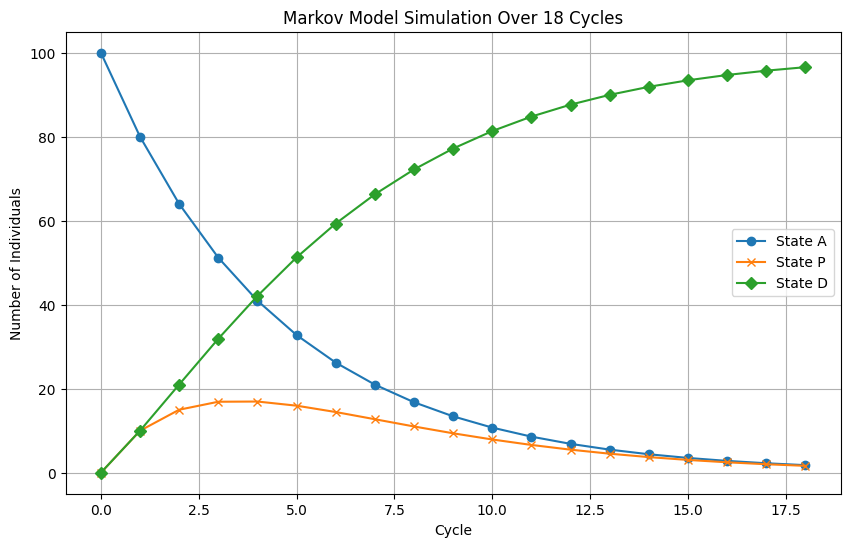

In [41]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(cycle_numbers, states_A, marker='o', label='State A')
plt.plot(cycle_numbers, states_P, marker='x', label='State P')
plt.plot(cycle_numbers, states_D, marker='D', label='State D')
plt.xlabel('Cycle')
plt.ylabel('Number of Individuals')
plt.title('Markov Model Simulation Over 18 Cycles')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
# -----------------------------
# 2. Incorporate Cost and Utility
# -----------------------------

# Define the utility and cost for each state
utility_A = 0.75
cost_A = 400

utility_P = 0.5
cost_P = 800

# For state D, we assume utility and cost are 0 (absorbing state)
utility_D = 0.0
cost_D = 0

# Lists to store per-cycle costs and utilities
cycle_costs = []
cycle_utilities = []

print("Cycle-by-Cycle Cost and Utility:")
for i in range(cycles + 1):
    # Calculate the total cost and utility for this cycle
    cost_cycle = states_A[i] * cost_A + states_P[i] * cost_P + states_D[i] * cost_D
    util_cycle = states_A[i] * utility_A + states_P[i] * utility_P + states_D[i] * utility_D

    cycle_costs.append(cost_cycle)
    cycle_utilities.append(util_cycle)

    print(f"Cycle {i}: Cost = {cost_cycle:.2f}, Utility = {util_cycle:.2f}")

# Optionally, calculate cumulative cost and utility over all cycles
cumulative_cost = np.sum(cycle_costs)
cumulative_utility = np.sum(cycle_utilities)
average_cost_per_person = cumulative_cost / N
average_utility_per_person = cumulative_utility / N
average_Qaly = average_utility_per_person / cycles
print(f"Total Cost = {cumulative_cost:.2f}")
print(f"Total Utility = {cumulative_utility:.2f}")
print(f"Average Cost per Person = {average_cost_per_person:.2f}")
print(f"Average Utility per Person = {average_utility_per_person:.2f}")
print(f"Average QALY = {average_Qaly:.2f}")


Cycle-by-Cycle Cost and Utility:
Cycle 0: Cost = 40000.00, Utility = 75.00
Cycle 1: Cost = 40000.00, Utility = 65.00
Cycle 2: Cost = 37600.00, Utility = 55.50
Cycle 3: Cost = 34000.00, Utility = 46.85
Cycle 4: Cost = 29944.00, Utility = 39.20
Cycle 5: Cost = 25876.00, Utility = 32.56
Cycle 6: Cost = 22045.36, Utility = 26.89
Cycle 7: Cost = 18577.48, Utility = 22.10
Cycle 8: Cost = 15520.82, Utility = 18.09
Cycle 9: Cost = 12877.84, Utility = 14.76
Cycle 10: Cost = 10625.10, Utility = 12.01
Cycle 11: Cost = 8726.06, Utility = 9.75
Cycle 12: Cost = 7139.03, Utility = 7.90
Cycle 13: Cost = 5821.96, Utility = 6.39
Cycle 14: Cost = 4735.08, Utility = 5.16
Cycle 15: Cost = 3842.32, Utility = 4.16
Cycle 16: Cost = 3111.84, Utility = 3.35
Cycle 17: Cost = 2516.06, Utility = 2.70
Cycle 18: Cost = 2031.45, Utility = 2.17
Total Cost = 324990.39
Total Utility = 449.52
Average Cost per Person = 3249.90
Average Utility per Person = 4.50
Average QALY = 0.25


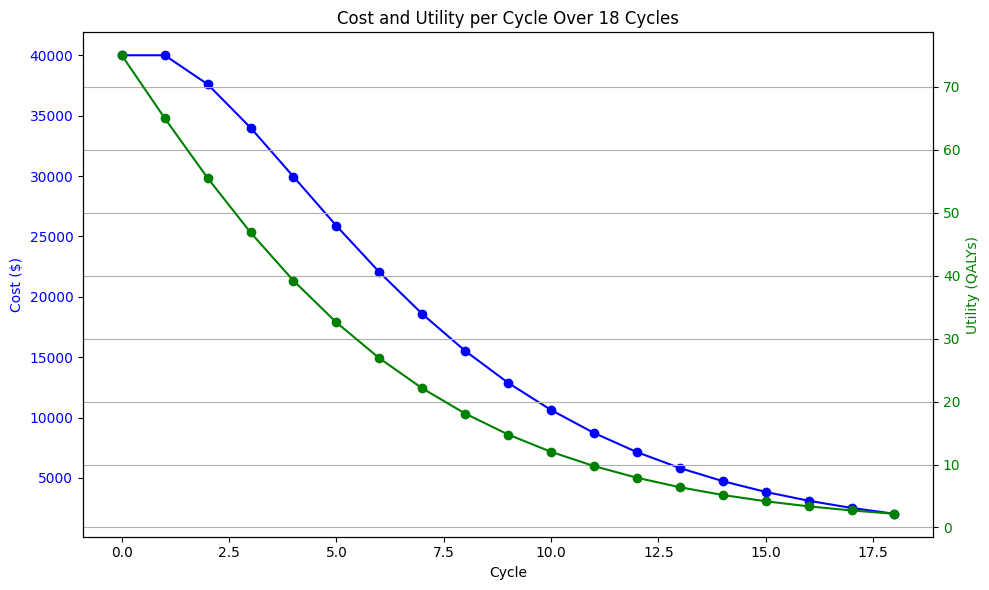

In [52]:
# Create a figure and axis for dual y-axis plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Cost on the primary y-axis
ax1.plot(cycle_numbers, cycle_costs, marker='o', color='blue', label='Cost')
ax1.set_xlabel('Cycle')
ax1.set_ylabel('Cost ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Utility
ax2 = ax1.twinx()
ax2.plot(cycle_numbers, cycle_utilities, marker='o', color='green', label='Utility')
ax2.set_ylabel('Utility (QALYs)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and Grid
plt.title('Cost and Utility per Cycle Over 18 Cycles')
fig.tight_layout()
plt.grid(True)

plt.show()

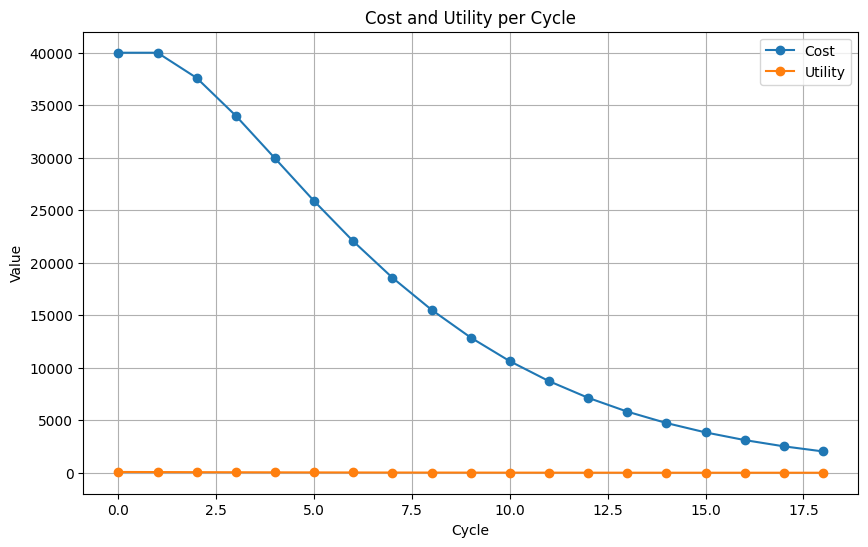

In [53]:
# -----------------------------
# 3. Plot the Cost and Utility per Cycle
# -----------------------------

plt.figure(figsize=(10, 6))
plt.plot(cycle_numbers, cycle_costs, marker='o', label='Cost')
plt.plot(cycle_numbers, cycle_utilities, marker='o', label='Utility')
plt.xlabel('Cycle')
plt.ylabel('Value')
plt.title('Cost and Utility per Cycle')
plt.legend()
plt.grid(True)
plt.show()

In [54]:

# Define parameters
N = 100         # initial number of individuals (all in state A)
cycles = 18     # total number of cycles

# Transition probabilities
pt1 = 0.05  # probability A -> P
pt2 = 0.3   # probability A -> D
pt3 = 0.1   # probability P -> D

# Define transition matrix T
# Row order: [A, P, D]
T = np.array([
    [1 - (pt1 + pt2), pt1, pt2],  # From state A: stay in A, A->P, A->D
    [0.0, 1 - pt3, pt3],           # From state P: assume no return to A, so P->P, P->D
    [0.0, 0.0, 1.0]                # From state D: absorbing state
])

print("Transition Matrix T:")
print(T)

# Initial state distribution: all individuals in state A
state = np.array([N, 0, 0], dtype=float)

# Lists to store state counts over time
states_A = [state[0]]
states_P = [state[1]]
states_D = [state[2]]

# Run the Markov simulation over the specified number of cycles
for cycle in range(1, cycles + 1):
    state = state.dot(T)
    states_A.append(state[0])
    states_P.append(state[1])
    states_D.append(state[2])

# Create an array for cycle numbers (0 through cycles)
cycle_numbers = np.arange(cycles + 1)

# Print final state distribution
print(f"\nState distribution at cycle {cycles}:")
print(f"State A: {states_A[-1]:.2f}, State P: {states_P[-1]:.2f}, State D: {states_D[-1]:.2f}")



Transition Matrix T:
[[0.65 0.05 0.3 ]
 [0.   0.9  0.1 ]
 [0.   0.   1.  ]]

State distribution at cycle 18:
State A: 0.04, State P: 2.99, State D: 96.96


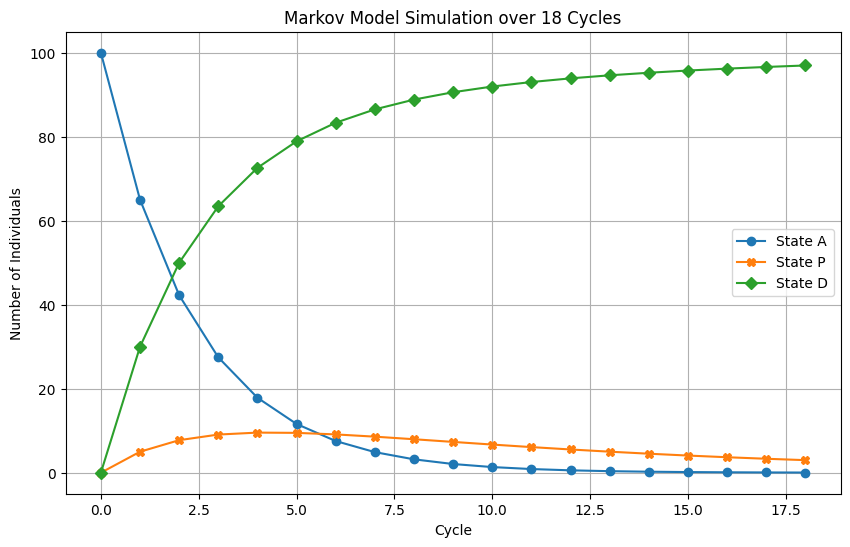

In [56]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(cycle_numbers, states_A, marker='o', label='State A')
plt.plot(cycle_numbers, states_P, marker='X', label='State P')
plt.plot(cycle_numbers, states_D, marker='D', label='State D')
plt.xlabel('Cycle')
plt.ylabel('Number of Individuals')
plt.title('Markov Model Simulation over 18 Cycles')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
# -------------------------------
# 3. Incorporate Cost and Utility
# -------------------------------

# Define utilities and costs per state
utility_A = 0.75
cost_A    = 400

utility_P = 0.5
cost_P    = 800

utility_D = 0.0
cost_D    = 0

# Lists to store cost and utility values per cycle
cycle_costs = []
cycle_utilities = []

print("Cycle-by-Cycle Cost and Utility:")
for i in range(cycles + 1):
    # Calculate total cost and utility for cycle i
    cost_cycle = states_A[i] * cost_A + states_P[i] * cost_P + states_D[i] * cost_D
    util_cycle = states_A[i] * utility_A + states_P[i] * utility_P + states_D[i] * utility_D

    cycle_costs.append(cost_cycle)
    cycle_utilities.append(util_cycle)

    print(f"Cycle {i}: Cost = {cost_cycle:.2f}, Utility = {util_cycle:.2f}")

# Compute cumulative cost and cumulative utility over all cycles
cumulative_cost = np.sum(cycle_costs)
cumulative_utility = np.sum(cycle_utilities)

# Calculate per person averages (assuming N individuals)
cost_per_person = cumulative_cost / N
utility_per_person = cumulative_utility / N

print("\nCumulative over 18 cycles:")
print(f"Total Cost (cohort): {cumulative_cost:.2f}")
print(f"Total Utility (cohort): {cumulative_utility:.2f}")
print(f"Cost per person: {cost_per_person:.2f}")
print(f"Utility per person: {utility_per_person:.2f}")



Cycle-by-Cycle Cost and Utility:
Cycle 0: Cost = 40000.00, Utility = 75.00
Cycle 1: Cost = 30000.00, Utility = 51.25
Cycle 2: Cost = 23100.00, Utility = 35.56
Cycle 3: Cost = 18255.00, Utility = 25.14
Cycle 4: Cost = 14781.75, Utility = 18.16
Cycle 5: Cost = 12232.54, Utility = 13.45
Cycle 6: Cost = 10313.11, Utility = 10.22
Cycle 7: Cost = 8829.29, Utility = 7.97
Cycle 8: Cost = 7652.22, Utility = 6.38
Cycle 9: Cost = 6695.81, Utility = 5.22
Cycle 10: Cost = 5901.96, Utility = 4.36
Cycle 11: Cost = 5230.99, Utility = 3.71
Cycle 12: Cost = 4655.38, Utility = 3.19
Cycle 13: Cost = 4155.72, Utility = 2.78
Cycle 14: Cost = 3717.96, Utility = 2.44
Cycle 15: Cost = 3331.75, Utility = 2.16
Cycle 16: Cost = 2989.20, Utility = 1.92
Cycle 17: Cost = 2684.19, Utility = 1.71
Cycle 18: Cost = 2411.81, Utility = 1.53

Cumulative over 18 cycles:
Total Cost (cohort): 206938.68
Total Utility (cohort): 272.15
Cost per person: 2069.39
Utility per person: 2.72


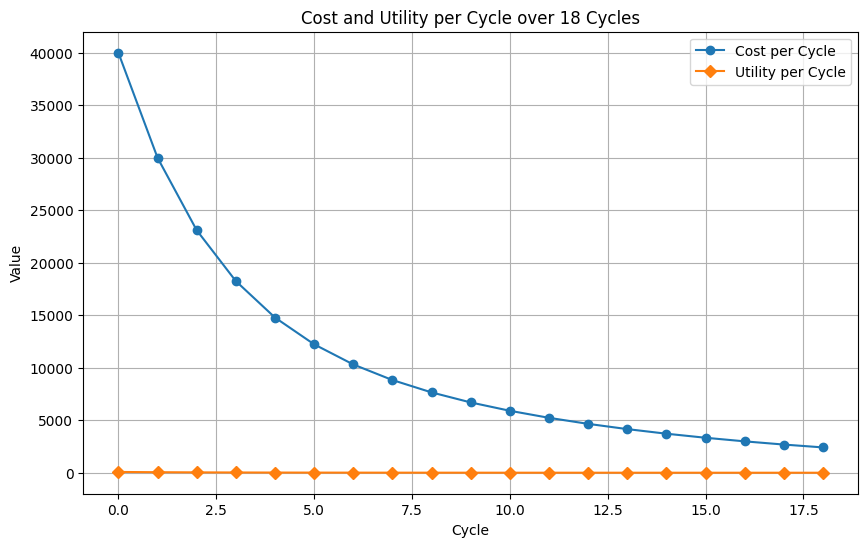

In [58]:
# -------------------------------
# 4. Plot the Cost and Utility per Cycle
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(cycle_numbers, cycle_costs, marker='o', label='Cost per Cycle')
plt.plot(cycle_numbers, cycle_utilities, marker='D', label='Utility per Cycle')
plt.xlabel('Cycle')
plt.ylabel('Value')
plt.title('Cost and Utility per Cycle over 18 Cycles')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# Example values for the two strategies:
cost_strategy1 = 3249.90   # cost per person for comparator
utility_strategy1 = 4.50  # utility (e.g., QALYs) per person for comparator

cost_strategy2 = 2069.39   # cost per person for intervention
utility_strategy2 = 2.72 # utility (e.g., QALYs) per person for intervention

# Calculate incremental values
delta_cost = cost_strategy2 - cost_strategy1
delta_utility = utility_strategy2 - utility_strategy1

# Compute ICER
ICER = delta_cost / delta_utility

print(f"Incremental Cost: {delta_cost}")
print(f"Incremental Effectiveness (QALYs): {delta_utility}")
print(f"ICER: {ICER} dollars per QALY")


Incremental Cost: -1180.5100000000002
Incremental Effectiveness (QALYs): -1.7799999999999998
ICER: 663.2078651685396 dollars per QALY


Incremental Cost of -$1,180.51:


This negative value means the intervention SAVES money compared to no intervention
The intervention costs $1,180.51 less per patient than standard care


Incremental Effectiveness of -1.78 QALYs:


This negative value means patients LOSE 1.78 quality-adjusted life years with the intervention
The intervention results in worse health outcomes than standard care


ICER of $663.21 per QALY:


In this case, the ICER represents SAVINGS per QALY lost
For each QALY lost, you save $663.21
However, this is not a favorable ICER because we're trading health for money

Decision Making Implications:

This intervention is in the "Southwest" quadrant of the cost-effectiveness plane, meaning:


It saves money (desired)
But reduces health benefits (undesired)


This is typically considered an UNFAVORABLE result because:


Most healthcare systems are unwilling to sacrifice substantial health benefits just to save money
The savings per QALY lost ($663.21) is very low compared to typical willingness-to-pay thresholds (e.g., $20,000-$30,000 per QALY in the US)


Recommendation:


Despite the cost savings, this intervention would likely NOT be recommended
The loss of 1.78 QALYs is substantial and the monetary savings are relatively small
Most healthcare systems would prefer to pay more to maintain better health outcomes

In [60]:


# =============================================================================
# 1. Define the Markov Model
# =============================================================================

def run_markov_model(pt1, pt2, pt3, N=100, cycles=18,
                     cost_A=400, utility_A=0.8,
                     cost_P=800, utility_P=0.6,
                     cost_D=0, utility_D=0):
    """
    Runs the Markov model over a given number of cycles with the supplied parameters.
    Transition probabilities:
      - From state A: P(A->A) = 1 - (pt1 + pt2), P(A->P) = pt1, P(A->D) = pt2.
      - From state P: P(P->P) = 1 - pt3, P(P->D) = pt3.
      - From state D: absorbing (P(D->D)=1).

    Returns:
      - cost_per_person: cumulative cost per person over the simulation.
      - utility_per_person: cumulative utility per person over the simulation.
    """
    # Transition matrix: rows = current state [A, P, D]; columns = next state.
    T = np.array([
        [1 - (pt1 + pt2), pt1, pt2],
        [0.0, 1 - pt3, pt3],
        [0.0, 0.0, 1.0]
    ])

    # Initial state distribution (all individuals in state A)
    state = np.array([N, 0, 0], dtype=float)

    # Lists to track state occupancy (cycle-years) for each state
    occupancy_A = [state[0]]
    occupancy_P = [state[1]]
    occupancy_D = [state[2]]

    # Run simulation for each cycle
    for cycle in range(1, cycles + 1):
        state = state.dot(T)
        occupancy_A.append(state[0])
        occupancy_P.append(state[1])
        occupancy_D.append(state[2])

    # Calculate per-cycle costs and utilities (for the entire cohort)
    cycle_costs = []
    cycle_utilities = []
    for i in range(cycles + 1):
        cost_cycle = occupancy_A[i] * cost_A + occupancy_P[i] * cost_P + occupancy_D[i] * cost_D
        util_cycle = occupancy_A[i] * utility_A + occupancy_P[i] * utility_P + occupancy_D[i] * utility_D
        cycle_costs.append(cost_cycle)
        cycle_utilities.append(util_cycle)

    cumulative_cost = np.sum(cycle_costs)
    cumulative_utility = np.sum(cycle_utilities)

    cost_per_person = cumulative_cost / N
    utility_per_person = cumulative_utility / N

    return cost_per_person, utility_per_person

# Base-case parameters
base_pt1 = 0.05
base_pt2 = 0.3
base_pt3 = 0.1



In [61]:
# =============================================================================
# 2. Probabilistic Sensitivity Analysis (PSA)
# =============================================================================

# For PSA, assume Beta distributions for the probabilities:
# Choose alpha and beta parameters so that the mean matches our base-case values.
# For example, for pt1 with mean 0.05, we might choose alpha=5, beta=95.
# Similarly for pt2 and pt3.

n_simulations = 1000

# Define beta distribution parameters (these are examples; you may use data to inform these)
alpha_pt1, beta_pt1 = 5, 95   # mean = 5/(5+95)=0.05
alpha_pt2, beta_pt2 = 30, 70  # mean = 30/(30+70)=0.3
alpha_pt3, beta_pt3 = 10, 90  # mean = 10/(10+90)=0.1

# Store PSA outputs
costs_psa = []
utilities_psa = []

np.random.seed(123)  # for reproducibility

for i in range(n_simulations):
    sample_pt1 = beta.rvs(alpha_pt1, beta_pt1)
    sample_pt2 = beta.rvs(alpha_pt2, beta_pt2)
    sample_pt3 = beta.rvs(alpha_pt3, beta_pt3)

    # Run the model with these sampled parameters
    cost, utility = run_markov_model(sample_pt1, sample_pt2, sample_pt3)
    costs_psa.append(cost)
    utilities_psa.append(utility)

# Summarize PSA results
mean_cost = np.mean(costs_psa)
mean_utility = np.mean(utilities_psa)

print("PSA Results (based on 1000 simulations):")
print(f"Mean Cost per Person: {mean_cost:.2f}")
print(f"Mean Utility per Person: {mean_utility:.2f}")




PSA Results (based on 1000 simulations):
Mean Cost per Person: 2085.27
Mean Utility per Person: 3.02


In [62]:
# =============================================================================
# 3. One-Way Sensitivity Analysis and Tornado Plot
# =============================================================================

# We now vary each parameter one at a time by ±10% (for illustration)
variation = 0.10

# Store the low and high outcomes for each parameter
parameters = ['pt1', 'pt2', 'pt3']
low_vals = []
high_vals = []
base_results = run_markov_model(base_pt1, base_pt2, base_pt3)
base_cost, base_util = base_results

# For each parameter, vary ±10% (while holding the others constant at base-case)
# We'll focus on cost per person here (you could do the same for utility)
for param in parameters:
    if param == 'pt1':
        low = base_pt1 * (1 - variation)
        high = base_pt1 * (1 + variation)
        cost_low, _ = run_markov_model(low, base_pt2, base_pt3)
        cost_high, _ = run_markov_model(high, base_pt2, base_pt3)
    elif param == 'pt2':
        low = base_pt2 * (1 - variation)
        high = base_pt2 * (1 + variation)
        cost_low, _ = run_markov_model(base_pt1, low, base_pt3)
        cost_high, _ = run_markov_model(base_pt1, high, base_pt3)
    elif param == 'pt3':
        low = base_pt3 * (1 - variation)
        high = base_pt3 * (1 + variation)
        cost_low, _ = run_markov_model(base_pt1, base_pt2, low)
        cost_high, _ = run_markov_model(base_pt1, base_pt2, high)

    low_vals.append(cost_low)
    high_vals.append(cost_high)
    print(f"{param} varied: low = {low:.3f} -> cost = {cost_low:.2f}; high = {high:.3f} -> cost = {cost_high:.2f}")



pt1 varied: low = 0.045 -> cost = 2004.17; high = 0.055 -> cost = 2132.95
pt2 varied: low = 0.270 -> cost = 2253.94; high = 0.330 -> cost = 1912.21
pt3 varied: low = 0.090 -> cost = 2127.64; high = 0.110 -> cost = 2016.11


Ah yes, let me correct the interpretation using dollars ($):

1. Transition Probability 1 (pt1):
- When pt1 is LOW (0.045):
  * Total cost = $2,004.17
- When pt1 is HIGH (0.055):
  * Total cost = $2,132.95
- Impact: Higher pt1 increases costs by $128.78
- This suggests pt1 has a moderate positive relationship with costs

2. Transition Probability 2 (pt2):
- When pt2 is LOW (0.270):
  * Total cost = $2,253.94
- When pt2 is HIGH (0.330):
  * Total cost = $1,912.21
- Impact: Higher pt2 decreases costs by $341.73
- This shows pt2 has a strong negative relationship with costs
- This is the most influential parameter among the three

3. Transition Probability 3 (pt3):
- When pt3 is LOW (0.090):
  * Total cost = $2,127.64
- When pt3 is HIGH (0.110):
  * Total cost = $2,016.11
- Impact: Higher pt3 decreases costs by $111.53
- This indicates pt3 has a moderate negative relationship with costs

Key Insights:
1. pt2 is the most sensitive parameter, with the largest cost swing ($341.73)
2. pt1 and pt3 have smaller impacts ($128.78 and $111.53 respectively)
3. pt1 is unique in that increasing it raises costs, while higher values of pt2 and pt3 lower costs


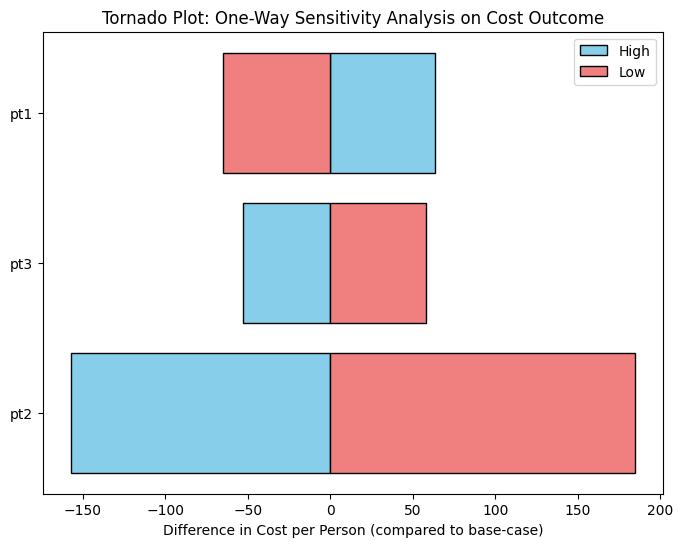

In [ ]:
# Create data for the tornado plot
# Calculate the effect as the difference from the base-case cost outcome.
base_outcome = base_cost
parameter_effects = []
for i in range(len(parameters)):
    # Determine the range (max difference from base-case)
    diff_low = base_outcome - low_vals[i]
    diff_high = high_vals[i] - base_outcome
    parameter_effects.append((parameters[i], diff_low, diff_high))

# Sort parameters by the maximum effect on cost
parameter_effects.sort(key=lambda x: max(x[1], x[2]), reverse=True)

# Prepare data for the tornado plot (horizontal bar plot)
labels = []
low_diffs = []
high_diffs = []

for param, diff_low, diff_high in parameter_effects:
    labels.append(param)
    low_diffs.append(-diff_low)  # negative effect (lower than base)
    high_diffs.append(diff_high)  # positive effect (higher than base)

# Plot tornado diagram
fig, ax = plt.subplots(figsize=(8, 6))

y_pos = np.arange(len(labels))
# Plot bars: one for low difference and one for high difference
ax.barh(y_pos, high_diffs, color='skyblue', edgecolor='black', label='High')
ax.barh(y_pos, low_diffs, color='lightcoral', edgecolor='black', label='Low')

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # highest impact on top
ax.set_xlabel('Difference in Cost per Person (compared to base-case)')
ax.set_title('Tornado Plot: One-Way Sensitivity Analysis on Cost Outcome')
ax.legend()

plt.show()

In [63]:
# Number of PSA iterations
n_simulations = 1000

# Base-case parameters for Strategy 1 (Comparator)
alpha_pt1_1, beta_pt1_1 = 5, 95    # mean ~0.05
alpha_pt2_1, beta_pt2_1 = 30, 70   # mean ~0.30
alpha_pt3_1, beta_pt3_1 = 10, 90   # mean ~0.10

# For Strategy 2 (Intervention), we assume an improvement in pt2:
alpha_pt1_2, beta_pt1_2 = 5, 95    # same as comparator
alpha_pt2_2, beta_pt2_2 = 25, 75   # mean ~0.25 (improved)
alpha_pt3_2, beta_pt3_2 = 10, 90   # same as comparator

# Containers for outcomes
costs_strategy1 = []
utils_strategy1 = []

costs_strategy2 = []
utils_strategy2 = []

np.random.seed(123)  # For reproducibility

for i in range(n_simulations):
    # Sample for Strategy 1
    sample_pt1_1 = beta.rvs(alpha_pt1_1, beta_pt1_1)
    sample_pt2_1 = beta.rvs(alpha_pt2_1, beta_pt2_1)
    sample_pt3_1 = beta.rvs(alpha_pt3_1, beta_pt3_1)

    cost1, util1 = run_markov_model(sample_pt1_1, sample_pt2_1, sample_pt3_1)
    costs_strategy1.append(cost1)
    utils_strategy1.append(util1)

    # Sample for Strategy 2
    sample_pt1_2 = beta.rvs(alpha_pt1_2, beta_pt1_2)
    sample_pt2_2 = beta.rvs(alpha_pt2_2, beta_pt2_2)
    sample_pt3_2 = beta.rvs(alpha_pt3_2, beta_pt3_2)

    cost2, util2 = run_markov_model(sample_pt1_2, sample_pt2_2, sample_pt3_2)
    costs_strategy2.append(cost2)
    utils_strategy2.append(util2)

# Convert lists to numpy arrays for easier computation
costs_strategy1 = np.array(costs_strategy1)
utils_strategy1 = np.array(utils_strategy1)
costs_strategy2 = np.array(costs_strategy2)
utils_strategy2 = np.array(utils_strategy2)

# Calculate incremental outcomes: Strategy 2 - Strategy 1
incremental_cost = costs_strategy2 - costs_strategy1
incremental_qaly = utils_strategy2 - utils_strategy1

print("PSA complete.")
print(f"Mean incremental cost: {np.mean(incremental_cost):.2f}")
print(f"Mean incremental QALY: {np.mean(incremental_qaly):.2f}")


PSA complete.
Mean incremental cost: 324.89
Mean incremental QALY: 0.48


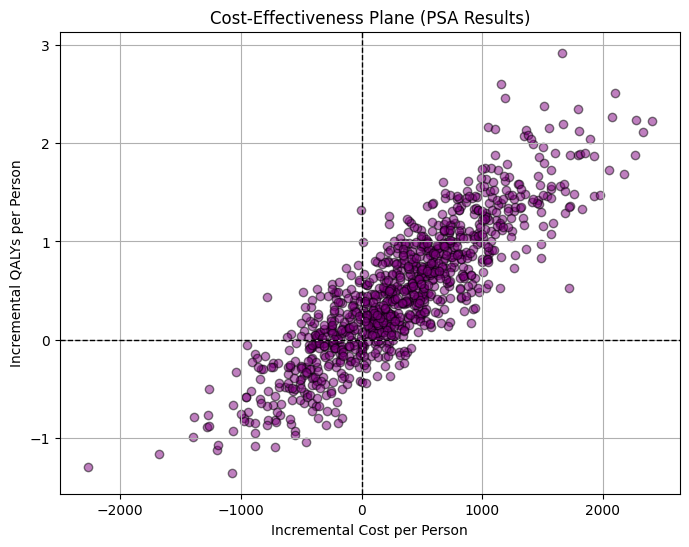

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(incremental_cost, incremental_qaly, color='purple', alpha=0.5, edgecolor='k')
plt.axvline(0, color='black', linestyle='--', lw=1)
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.xlabel('Incremental Cost per Person')
plt.ylabel('Incremental QALYs per Person')
plt.title('Cost-Effectiveness Plane (PSA Results)')
plt.grid(True)
plt.show()


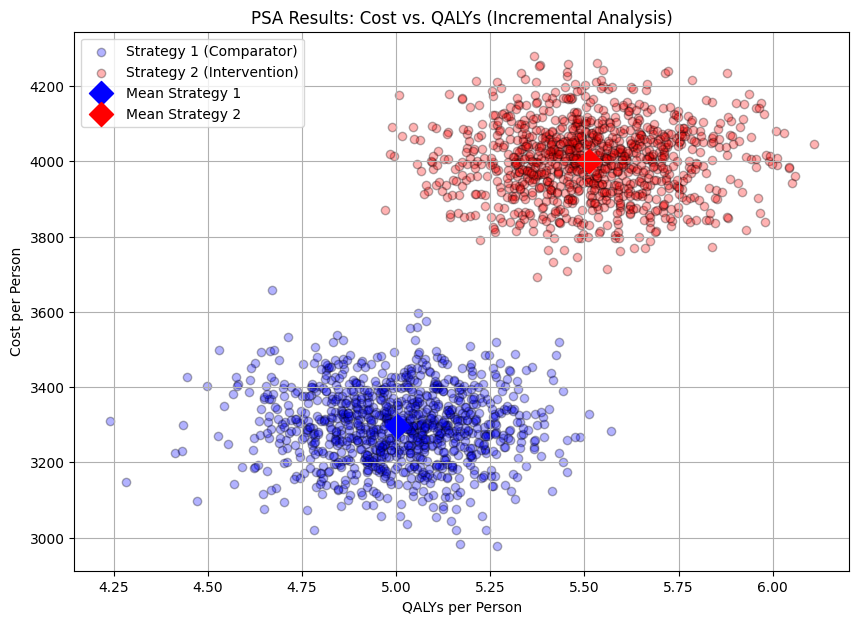

In [65]:


# --- Assume these arrays have been computed from your PSA ---
# For example, using the PSA code provided earlier:
#   costs_strategy1, utils_strategy1, costs_strategy2, utils_strategy2,
#   mean_cost1, mean_util1, mean_cost2, mean_util2

# Dummy data for demonstration purposes (remove these in your code):
np.random.seed(123)
costs_strategy1 = np.random.normal(3300, 100, 1000)
utils_strategy1 = np.random.normal(5, 0.2, 1000)
costs_strategy2 = np.random.normal(4000, 100, 1000)
utils_strategy2 = np.random.normal(5.5, 0.2, 1000)
mean_cost1 = np.mean(costs_strategy1)
mean_util1 = np.mean(utils_strategy1)
mean_cost2 = np.mean(costs_strategy2)
mean_util2 = np.mean(utils_strategy2)

# --- Create the scatter plot ---
plt.figure(figsize=(10, 7))
# Plot individual PSA simulation points for Strategy 1 (Comparator)
plt.scatter(utils_strategy1, costs_strategy1, color='blue', alpha=0.3,
            label='Strategy 1 (Comparator)', edgecolor='k')
# Plot individual PSA simulation points for Strategy 2 (Intervention)
plt.scatter(utils_strategy2, costs_strategy2, color='red', alpha=0.3,
            label='Strategy 2 (Intervention)', edgecolor='k')

# Plot the mean outcomes as larger diamond markers
plt.scatter(mean_util1, mean_cost1, color='blue', s=150, marker='D',
            label='Mean Strategy 1')
plt.scatter(mean_util2, mean_cost2, color='red', s=150, marker='D',
            label='Mean Strategy 2')

# Draw an arrow showing the incremental difference from Strategy 1 to Strategy 2
#plt.arrow(mean_util1, mean_cost1,
          #mean_util2 - mean_util1, mean_cost2 - mean_cost1,
          #color='black', width=5, head_width=0.05 * (mean_cost2-mean_cost1),
          #length_includes_head=True, label='Incremental Difference')

plt.xlabel('QALYs per Person')
plt.ylabel('Cost per Person')
plt.title('PSA Results: Cost vs. QALYs (Incremental Analysis)')
plt.legend()
plt.grid(True)
plt.show()


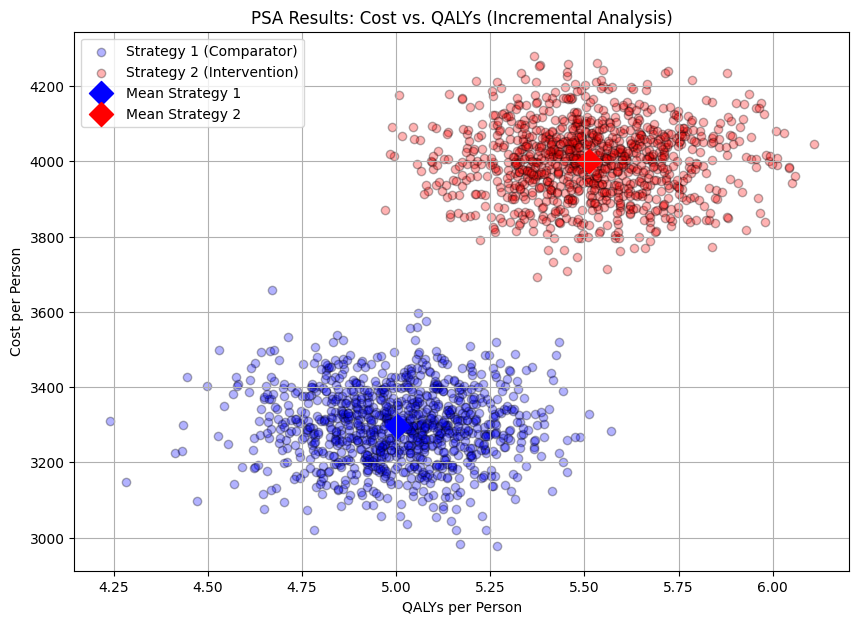

In [66]:

# --- Assume these arrays have been computed from your PSA ---
# For example, using the PSA code provided earlier:
#   costs_strategy1, utils_strategy1, costs_strategy2, utils_strategy2,
#   mean_cost1, mean_util1, mean_cost2, mean_util2

# Dummy data for demonstration purposes (remove these in your code):
np.random.seed(123)
costs_strategy1 = np.random.normal(3300, 100, 1000)
utils_strategy1 = np.random.normal(5, 0.2, 1000)
costs_strategy2 = np.random.normal(4000, 100, 1000)
utils_strategy2 = np.random.normal(5.5, 0.2, 1000)
mean_cost1 = np.mean(costs_strategy1)
mean_util1 = np.mean(utils_strategy1)
mean_cost2 = np.mean(costs_strategy2)
mean_util2 = np.mean(utils_strategy2)

# --- Create the scatter plot ---
plt.figure(figsize=(10, 7))
# Plot individual PSA simulation points for Strategy 1 (Comparator)
plt.scatter(utils_strategy1, costs_strategy1, color='blue', alpha=0.3,
            label='Strategy 1 (Comparator)', edgecolor='k')
# Plot individual PSA simulation points for Strategy 2 (Intervention)
plt.scatter(utils_strategy2, costs_strategy2, color='red', alpha=0.3,
            label='Strategy 2 (Intervention)', edgecolor='k')

# Plot the mean outcomes as larger diamond markers
plt.scatter(mean_util1, mean_cost1, color='blue', s=150, marker='D',
            label='Mean Strategy 1')
plt.scatter(mean_util2, mean_cost2, color='red', s=150, marker='D',
            label='Mean Strategy 2')

# Draw an arrow showing the incremental difference from Strategy 1 to Strategy 2
#plt.arrow(mean_util1, mean_cost1,
          #mean_util2 - mean_util1, mean_cost2 - mean_cost1,
          #color='black', width=5, head_width=0.05 * (mean_cost2-mean_cost1),
          #length_includes_head=True, label='Incremental Difference')

plt.xlabel('QALYs per Person')
plt.ylabel('Cost per Person')
plt.title('PSA Results: Cost vs. QALYs (Incremental Analysis)')
plt.legend()
plt.grid(True)
plt.show()
